# Sunspots Dataset

Annual data over 250 years.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

## Load and Prepare Data

In [2]:
data = np.loadtxt("src/sunspot.dat")
year = range(1700,1984+1)
expected = np.loadtxt("src/sunspot2.dat")[-5:]

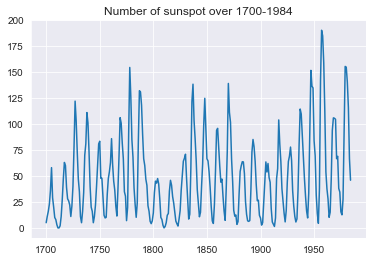

In [3]:
sns.lineplot(x=year, y=data)
plt.title("Number of sunspot over 1700-1984")
plt.savefig("pic/Sunspots_original.pdf", bbox_inches="tight")
plt.show()

In [4]:
y = np.sqrt(data)

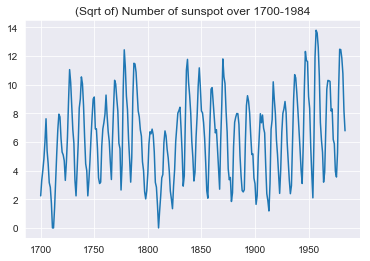

In [5]:
sns.lineplot(year, y=y)
plt.title("(Sqrt of) Number of sunspot over 1700-1984")
plt.savefig("pic/Sunspots_transformed.pdf", bbox_inches="tight")
plt.show()

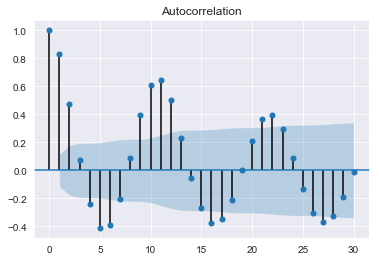

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=30)
plt.savefig("pic/Sunspots_acf.pdf", bbox_inches="tight")
plt.show()

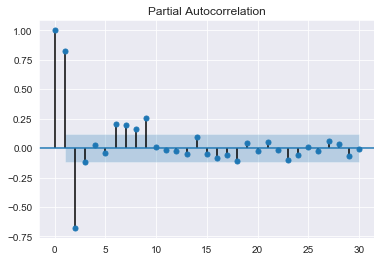

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y, lags=30)
plt.savefig("pic/Sunspots_pacf.pdf", bbox_inches="tight")
plt.show()

In [8]:
from statsmodels.tsa.ar_model import AR
model = AR(y).fit()
yhat = model.predict(len(y),len(y)+len(expected)-2)
print(yhat**2)

[26.3173986  19.57096978 21.36519288 43.96334534]


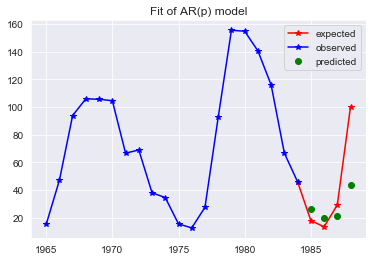

In [9]:
plt.plot(range(max(year),max(year)+5), (expected), 'r*-', label="expected")
plt.plot(year[-20:],y[-20:]**2,'b*-', label="observed")
plt.plot(range(max(year)+1,max(year)+5), yhat**2, 'go', label="predicted")
plt.title("Fit of AR(p) model")
plt.legend()
plt.savefig("pic/Sunspots_AR_fit.pdf", bbox_inches="tight")
plt.show()

In [10]:
len(model.params)

17

In [11]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(y, order=(0, 1)).fit(disp=False)
yhat = model.predict(len(y),len(y)+len(expected)-2)
print(yhat**2)

[46.8412104  40.23836885 40.23836885 40.23836885]


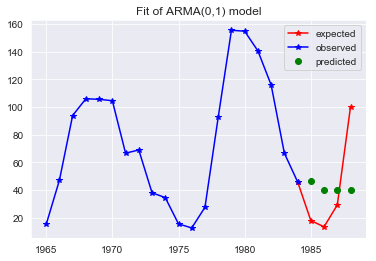

In [12]:
plt.plot(range(max(year),max(year)+5), (expected), 'r*-', label="expected")
plt.plot(year[-20:],y[-20:]**2,'b*-', label="observed")
plt.plot(range(max(year)+1,max(year)+5), yhat**2, 'go', label="predicted")
plt.title("Fit of ARMA(0,1) model")
plt.legend()
plt.savefig("pic/Sunspots_ARMA_0_1_fit.pdf", bbox_inches="tight")
plt.show()

Trying AR(11) as per best model found in paper [Modeling and Periodicity Analysis of Sunspot Time Series 1700-2015](https://www.omicsonline.org/open-access/modeling-and-periodicity-analysis-of-sunspot-time-series-17002015-2168-9679-1000385.pdf). Paper used BIC as the metric.

In [13]:
model = ARMA(y, order=(11, 0))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(y),len(y)+len(expected)-2)
print(yhat**2)

[29.49799542 22.35748179 24.121681   44.7325505 ]


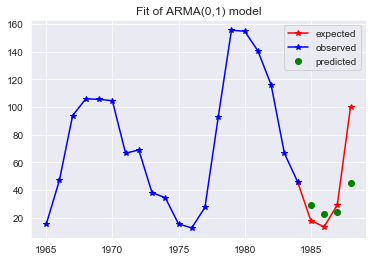

In [14]:
plt.plot(range(max(year),max(year)+5), (expected), 'r*-', label="expected")
plt.plot(year[-20:],y[-20:]**2,'b*-', label="observed")
plt.plot(range(max(year)+1,max(year)+5), yhat**2, 'go', label="predicted")
plt.title("Fit of ARMA(0,1) model")
plt.legend()
plt.savefig("pic/Sunspots_ARMA_11_0_fit.pdf", bbox_inches="tight")
plt.show()

Do a parameter sweep up to AR(15). Using AIC not BIC as the metric.

In [15]:
aic = [ARMA(y, order=(p,0)).fit(disp=0).aic for p in range(15)]

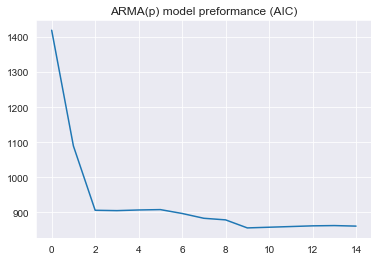

In [16]:
plt.plot(aic)
plt.title("ARMA(p) model preformance (AIC)")
plt.savefig("pic/Sunspots_ARMA_aic_sweep.pdf", bbox_inches="tight")
plt.show()

In [17]:
model = ARMA(y, order=(9,0)).fit(disp=0)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  285
Model:                     ARMA(9, 0)   Log Likelihood                -416.847
Method:                       css-mle   S.D. of innovations              1.037
Date:                Sun, 24 Mar 2019   AIC                            855.694
Time:                        10:21:45   BIC                            895.872
Sample:                             0   HQIC                           871.800
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3296      0.534     11.844      0.000       5.282       7.377
ar.L1.y        1.2208      0.057     21.555      0.000       1.110       1.332
ar.L2.y       -0.4791      0.091     -5.259      0.0

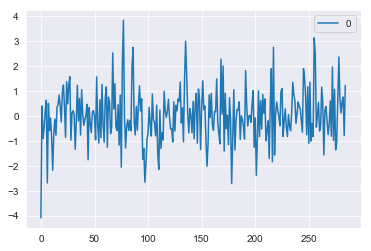

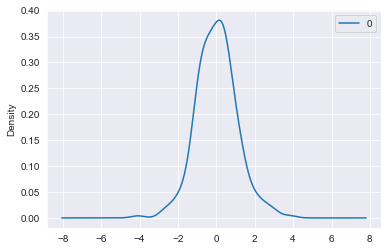

                0
count  285.000000
mean     0.012549
std      1.065830
min     -4.093574
25%     -0.692183
50%      0.016957
75%      0.607109
max      3.837647


In [18]:
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.savefig("pic/Sunspots_ARMA_9_residuals.pdf", bbox_inches="tight")
plt.show()
residuals.plot(kind='kde')
plt.savefig("pic/Sunspots_ARMA_9_residuals_kde.pdf", bbox_inches="tight")
plt.show()

print(residuals.describe())